#          INTRODUCTION TO MACHINE LEARNING

We are going to perform drone imagery classification on the training dataset for crop types in Rwanda.

The dataset contains 2611 crop type images with 24 labels classified as:

"banana",
                    "maize",
                    "unknown",
                    "avocados",
                    "sweet_potatoe",
                    "forest",
                    "peas",
                    "climbing_beans",
                    "wheat",
                    "natural_vegetation",
                    "bush_beans",
                    "ordinary_beans",
                    "cassava",
                    "mangoes",
                    "other_known",
                    "fallow",
                    "irish_potatoe",
                    "fodder",
                    "eggplants",
                    "tomato_trees",
                    "carrots",
                    "bare_earth",
                    "structure",
                    "passion_fruit"
                    
The aim of this tutorial is to:
1. Obtain the data from Radiant Earth's python client successfully
2. Extract this data and process it to a better form to build the ML model
3. Training and evaluating the model
4. Transfer learning using the test data

To achieve the first, we will have to install radiant's MLhub library using pip.

**NOTE:** Make sure Jupyter notebook is run with administrative privileges or the installation could fail.

The documentation of the library is available at: https://radiant-mlhub.readthedocs.io/en/latest/getting_started.html#installation

In [1]:
!pip install radiant_mlhub

  Using cached radiant_mlhub-0.1.2-py3-none-any.whl (23 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached pystac-0.5.6-py3-none-any.whl (136 kB)
  Using cached tqdm-4.56.2-py2.py3-none-any.whl (72 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0


We will need an API key to implement the library.
To obtain that:
1. Sign up on MLHub and generate an API key (steps are available in the documentation referenced earlier)
2. Use the following on the Anaconda prompt or command line: 'mlhub configure'

The command prompt diplays the following message:

'API Key: Enter your API key here...'

3. Copy and paste the API key generated earlier

Wrote profile to C:\Users\Maximus\.mlhub\profiles

In [2]:
#let's view the datasets contained in the data registry
from radiant_mlhub import Dataset
for dataset in Dataset.list():
    print(f'{dataset.id}: {dataset.title}')

idiv_asia_crop_type: A crop type dataset for consistent land cover classification in Central Asia
bigearthnet_v1: BigEarthNet
microsoft_chesapeake: Chesapeake Land Cover
ref_african_crops_kenya_02: CV4A Kenya Crop Type Competition
ref_african_crops_uganda_01: Dalberg Data Insights Crop Type Uganda
rti_rwanda_crop_type: Drone Imagery Classification Training Dataset for Crop Types in Rwanda
ref_african_crops_tanzania_01: Great African Food Company Crop Type Tanzania
landcovernet_v1: LandCoverNet
open_cities_ai_challenge: Open Cities AI Challenge
ref_african_crops_kenya_01: PlantVillage Crop Type Kenya
su_african_crops_ghana: Semantic Segmentation of Crop Type in Ghana
su_african_crops_south_sudan: Semantic Segmentation of Crop Type in South Sudan
sen12floods: SEN12-FLOOD
ts_cashew_benin: Smallholder Cashew Plantations in Benin
spacenet1: Spacenet 1
spacenet2: Spacenet 2
spacenet3: Spacenet 3
spacenet4: Spacenet 4
spacenet5: Spacenet 5
spacenet6: Spacenet 6
spacenet7: Spacenet 7
nasa_trop

We are going to use rti rwanda crop type here

In [3]:
dataset.collections #viewing the collection id

[<Collection id=su_sar_moisture_content>]

The drone imagery dataset (rti rwanda crop type) is a collection.
We can view its contents using the Collection module

In [25]:
from radiant_mlhub import Collection
collections = Collection.list()
for i in collections:
    print (i, '\n')

<Collection id=ref_african_crops_kenya_01_labels> 

<Collection id=ref_african_crops_kenya_01_source> 

<Collection id=ref_african_crops_tanzania_01_labels> 

<Collection id=ref_african_crops_tanzania_01_source> 

<Collection id=ref_african_crops_uganda_01_labels> 

<Collection id=ref_african_crops_uganda_01_source> 

<Collection id=microsoft_chesapeake_landsat_leaf_off> 

<Collection id=microsoft_chesapeake_buildings> 

<Collection id=sn4_AOI_6_Atlanta> 

<Collection id=ref_african_crops_kenya_02_labels> 

<Collection id=ref_african_crops_kenya_02_source> 

<Collection id=microsoft_chesapeake_naip> 

<Collection id=microsoft_chesapeake_nlcd> 

<Collection id=microsoft_chesapeake_lc> 

<Collection id=microsoft_chesapeake_landsat_leaf_on> 

<Collection id=sn1_AOI_1_RIO> 

<Collection id=sn2_AOI_2_Vegas> 

<Collection id=sn2_AOI_5_Khartoum> 

<Collection id=sn3_AOI_2_Vegas> 

<Collection id=sn3_AOI_5_Khartoum> 

<Collection id=sn5_AOI_8_Mumbai> 

<Collection id=sn6_AOI_11_Rotterdam> 

<C

The dataset consists of:

1. Collection id = rti_rwanda_crop_type_labels 

2. Collection id = rti_rwanda_crop_type_source

Source collection id consists of the images that are to be trained in ML while

Labels collection id consists of the tags/classes/labels to the images.

We will download both of them by first 'fetching' their contents, then 'downloading' them to the local system. The Collection module once again, provides the packages needed.

In [31]:
collection = Collection.fetch('rti_rwanda_crop_type_labels')
archive_path = collection.download('~/Downloads/Data')  # Will raise exception if the file already exists

  0%|          | 0/0.9 [00:00<?, ?M/s]

In [32]:
collection = Collection.fetch('rti_rwanda_crop_type_source')
archive_path = collection.download('~/Downloads/Data')   # Will raise exception if the file already exists

  0%|          | 0/99.6 [00:00<?, ?M/s]

Delete collectons, leave only folder items

In [1]:
import os
import shutil

folder1 = "C:\\Users\\Maximus\\Downloads\\Extracted\\rti_rwanda_crop_type_labels"
folder2 = "C:\\Users\\Maximus\\Downloads\\Extracted\\rti_rwanda_crop_type_source"
source = []
for x in os.walk(folder1):
    source.append(x[0])
print(source[0])
source.pop(0)
print(source[1])
print(len(source))

destination = []
for y in os.walk(folder2):
    destination.append(y[0])
destination.pop(0)
print(destination[1])
print(len(destination))

C:\Users\Maximus\Downloads\Extracted\rti_rwanda_crop_type_labels
C:\Users\Maximus\Downloads\Extracted\rti_rwanda_crop_type_labels\rti_rwanda_crop_type_labels_1
2609
C:\Users\Maximus\Downloads\Extracted\rti_rwanda_crop_type_source\rti_rwanda_crop_type_source_1
2609


In [4]:
for i in range (0,2609):
    src_files = os.listdir(source[i])
    for file_name in src_files:
        full_file_name = os.path.join(source[i], file_name)
        if os.path.isfile(full_file_name):
            shutil.copy(full_file_name, destination[i])

Example images of the six classes used for training and validating the model; 

(a) Banana, (b) Maize, (c) Legume, (d) Forest, (e) Structure, and (f) Other.

In [1]:
folder = "C:\\Users\\Maximus\\Downloads\\Extracted\\rti_rwanda_crop_type_source" #prepared folder

In [11]:
import os
source = []
for x in os.walk(folder):
    source.append(x[0])
        # import json module for parsing

print(source[0])
source.pop(0)
print(source[1])
print(len(source))

C:\Users\Maximus\Downloads\Extracted\rti_rwanda_crop_type_source
C:\Users\Maximus\Downloads\Extracted\rti_rwanda_crop_type_source\rti_rwanda_crop_type_source_1
2609


In [40]:
import json

# define a list of keywords
keywords = (
                    "banana",
                    "maize",
                    "unknown",
                    "avocados",
                    "sweet_potatoe",
                    "forest",
                    "peas",
                    "climbing_beans",
                    "wheat",
                    "natural_vegetation",
                    "bush_beans",
                    "ordinary_beans",
                    "cassava",
                    "mangoes",
                    "other_known",
                    "fallow",
                    "irish_potatoe",
                    "fodder",
                    "eggplants",
                    "tomato_trees",
                    "carrots",
                    "bare_earth",
                    "structure",
                    "passion_fruit"
)
import shutil   
for i in range (0,2609):
    label = source[i]+'\labels.json'
    with open(label) as json_file:

        # read json file line by line
        for line in json_file.readlines():
            # create python dict from json object
            json_dict = json.loads(line)
            print(json_dict)
            if any(keyword in json_dict["label"].lower() for keyword in keywords):
                print (json_dict["label"])
                folder_name = json_dict["label"]
                images = source[i] +'\image.png'
                dest_path = 'C:\\Users\\Maximus\\Downloads\\Images'
                dest_folder = dest_path + "\\" + folder_name
                print(dest_folder)
                shutil.copy(images, dest_folder)
                '''
                FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Maximus\\Downloads\\Extracted\\rti_rwanda_crop_type_source\\rti_rwanda_crop_type_source_1422\\image.png'
                '''

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'peas'}
peas
C:\Users\Maximus\Downloads\Images\peas
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'bare_earth'}
bare_earth
C:\Users\Maximus\Downloads\Images\bare_earth
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'fodder'}
fodder
C:\Users\Maximus\Downloads\Images\fodder
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structu

{'label': 'ordinary_beans'}
ordinary_beans
C:\Users\Maximus\Downloads\Images\ordinary_beans
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
bana

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Maximus\\Downloads\\Extracted\\rti_rwanda_crop_type_source\\rti_rwanda_crop_type_source_1422\\labels.json'

In [74]:
folder = "C:\\Users\\Maximus\\Downloads\\Extracted\\rti_rwanda_crop_type_source" #prepared folder
import os
source = []
for x in os.walk(folder):
    source.append(x[0])
        # import json module for parsing

print(source[0])
source.pop(0)
print(source[1])
print(len(source))

C:\Users\Maximus\Downloads\Extracted\rti_rwanda_crop_type_source
C:\Users\Maximus\Downloads\Extracted\rti_rwanda_crop_type_source\rti_rwanda_crop_type_source_1
2593


In [83]:
import json

# define a list of keywords
keywords = (
                    "banana",
                    "maize",
                    "unknown",
                    "avocados",
                    "sweet_potatoe",
                    "forest",
                    "peas",
                    "climbing_beans",
                    "wheat",
                    "natural_vegetation",
                    "bush_beans",
                    "ordinary_beans",
                    "cassava",
                    "mangoes",
                    "other_known",
                    "fallow",
                    "irish_potatoe",
                    "fodder",
                    "eggplants",
                    "tomato_trees",
                    "carrots",
                    "bare_earth",
                    "structure",
                    "passion_fruit"
)
import shutil   
for i in range (0,2593):
    label = source[i]+'\labels.json'
    with open(label) as json_file:

        # read json file line by line
        for line in json_file.readlines():
            # create python dict from json object
            json_dict = json.loads(line)
            print(json_dict)
            if any(keyword in json_dict["label"].lower() for keyword in keywords):
                print (json_dict["label"])
                folder_name = json_dict["label"]
                images = source[i] +'\image.png'
                
                dest_path = 'C:\\Users\\Maximus\\Downloads\\Images'
                dest_folder = dest_path + "\\" + folder_name
                print(dest_folder)
                if os.path.isfile(images):   #checking if image.png is there, rather than removing manually 
                    if not os.path.exists(dest_folder): #if class folder doesn't exist, create it
                        os.mkdir(dest_folder)
                        
                    j = 0  #we'll use this for renaming files of the same name (images)
                    name = 'image' #name of the image
                    extension ='.png' #its file extension
                    
                    #rename the image file to avoid overwriting each
                    dest_filename = os.path.join(dest_folder, "%s%d%s" % (name, j,     extension))  #regex
                    while os.path.isfile(dest_filename): #while the image file has been created in the destination folder                                  
                        j += 1                                                                                                                      
                        dest_filename = os.path.join(dest_folder, "%s%d%s" % (name, j, extension))
                    shutil.copy(images, dest_filename) #finally copying as renaming has been taken care of   
                    
                '''
                FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Maximus\\Downloads\\Extracted\\rti_rwanda_crop_type_source\\rti_rwanda_crop_type_source_1422\\image.png'
                1422, 1434, 1439, 1456, 1459, 1476, 1479, 1487, 1506, 1510, 1517, 1527, 1544, 1549
                156, 1565
                '''
                

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'peas'}
peas
C:\Users\Maximus\Downloads\Images\peas
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'bare_earth'}
bare_earth
C:\Users\Maximus\Downloads\Images\bare_earth
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'fodder'}
fodder
C:\Users\Maximus\Downloads\Images\fodder
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'unknown'}
unknown
C:\Users\Maximus\Downl

{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Down

{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Imag

{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'bush_beans'}
bush_beans
C:\Users\Maximus\Downloads\Images\bush_beans
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'unknown'}
unknown
C:\Users\Maximus\Downloads\Images\unknown
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fallow'}
fallow
C:\Users\

{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Down

{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'unknown'}
unknown
C:\Users\Maximus\Downloads\Images\unknown
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Dow

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{

{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'unknown'}
unknown
C:\Users\Maximus\Downloads\Images\unknown
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'labe

{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\

{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fodder'}
fodder
C:\Users\Maximus\Downloads\Images\fodder
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fodder'}
fodder
C:\Users\Maximus\Downloads\Images\fodder
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Down

{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Im

{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maiz

{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'irish_potatoe'}
irish_potatoe
C:\Users\Maximus\Downloads\Images\irish_potatoe
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'l

{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'avocados'}
avocados
C:\Users\Maximus\Downloads\Images\avocados
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'irish_potatoe'}
irish_potatoe
C:\Users\Maximus\Downloads\Images\irish_potatoe
{'label': 'irish_potatoe'}
irish_potatoe
C:\Users\Maximus\Downloads\Images\irish_potatoe
{'label': 'irish_potatoe'}
irish_potatoe
C:\Users\Maximus\Down

{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'unknown'}
unknown
C:\Users\Maximus\Downloads\Images\unknown
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'unknown'}
unknow

{'label': 'unknown'}
unknown
C:\Users\Maximus\Downloads\Images\unknown
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'unknown'}
unknown
C:\Users\Maximus\Downloads\Images\unknown
{'label': 'bush_beans'}
bush_beans
C:\Users\Maximus\Downloads\Images\bush_beans
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'bush_beans'}
bush_beans
C:\Users\

{'label': 'bush_beans'}
bush_beans
C:\Users\Maximus\Downloads\Images\bush_beans
{'label': 'natural_vegetation'}
natural_vegetation
C:\Users\Maximus\Downloads\Images\natural_vegetation
{'label': 'natural_vegetation'}
natural_vegetation
C:\Users\Maximus\Downloads\Images\natural_vegetation
{'label': 'peas'}
peas
C:\Users\Maximus\Downloads\Images\peas
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'cassava'}
cassava
C:\Users\Maximus\Downloads\Images\cassava
{'label': 'natural_vegetation'}
natural_vegetation
C:\Users\Maximus\Downloads\Images\natural_vegetation
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'avocados'}
avocados
C:\Users\Maximus\Downloads\Images\avocados
{'label': 'cassava'}
cassava
C:\Users\Maximus\Downloads\Images\cassava
{'label': 'natural_vegetation'}
natural_vegetation
C:\Users\Maximus\Downloads\Images\natural_vegetation
{'label': 'bush_beans'}
bush_beans
C:\Users\Maximus\Downloads\Images\bush_beans
{'label': 

{'label': 'avocados'}
avocados
C:\Users\Maximus\Downloads\Images\avocados
{'label': 'sweet_potatoe'}
sweet_potatoe
C:\Users\Maximus\Downloads\Images\sweet_potatoe
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'cassava'}
cassava
C:\Users\Maximus\Downloads\Images\cassava
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'sweet_potatoe'}
sweet_potatoe
C:\Users\Maximus\Downloads\Images\sweet_potatoe
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}

{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'sweet_potatoe'}
sweet_potatoe
C:\Users\Maximus\Downloads\Images\sweet_potatoe
{'label': 'climbing_beans'}
climbing_beans
C:\Users\Maximus\Downloads\Images\climbing_beans
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'other_known'}
other_known
C:\Users\Maximus\Downloads\Images\other_known
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'fallow'}
fallow
C:\Users\Maximus\Downloads\Images\fallow
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'sweet_potatoe'}
sweet_potatoe
C:\Users\Maximus\Downloads\Images\sweet_potatoe
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'sweet_

{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'bare_earth'}
bare_earth
C:\Users\Maximus\Downloads\Images\bare_earth
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'peas'}
peas
C:\Users\Maximus\Downloads\Images\peas
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'forest'}
forest
C:\Users\Maximus\Downloads\Images\forest
{'label': 'structure'}
structure
C:\Users\Maximus\Downloads\Images\structure
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'banana'}
banana
C:\Users\Maximus\Downloads\Images\banana
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\maize
{'label': 'maize'}
maize
C:\Users\Maximus\Downloads\Images\mai

##  MACHINE LEARNING PREP

In [84]:
#install packages
!pip install tensorflow
!pip install tensorflow_hub

Let us also import the other libraries. Notes on these libraries are commented in the code

In [85]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt #graphical plots
import tensorflow as tf #deep learning
import tensorflow_hub as hub
import numpy as np #numerical procedures
import pandas as pd #data handling

In [86]:
pd.set_option("display.precision", 6) #setting display precision

In [98]:
data_root='C:\\Users\\Maximus\\Downloads\\Images' #access to the data on local system

In [91]:
!pip install keras 

In [92]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import model_from_json
import itertools
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

In [109]:
selectedClasses = (os.listdir(data_root)) #displaying the path and folders available
print (selectedClasses)

['avocados', 'banana', 'bare_earth', 'bush_beans', 'carrots', 'cassava', 'climbing_beans', 'eggplants', 'fallow', 'fodder', 'forest', 'irish_potatoe', 'maize', 'mangoes', 'natural_vegetation', 'ordinary_beans', 'other_known', 'passion_fruit', 'peas', 'structure', 'sweet_potatoe', 'tomato_trees', 'unknown', 'wheat']


In [140]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
        featurewise_center=True,
        featurewise_std_normalization=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        **datagen_kwargs)

In [141]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(validation_split=.25)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
validation_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

C:\Users\Maximus\Downloads\Images
Found 614 images belonging to 24 classes.
Found 1886 images belonging to 24 classes.


In [142]:
datagen_kwargs = dict(validation_split=.15)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
test_generator = test_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 365 images belonging to 24 classes.


In [143]:
print ("In train_generator ")
for cls in range(len (train_generator.class_indices)):
    print(selectedClasses[cls],":\t",list(train_generator.classes).count(cls))
    #displaying item number for train_generator
print ("") 

print ("In validation_generator ")
for cls in range(len (validation_generator.class_indices)):
    print(selectedClasses[cls],":\t",list(validation_generator.classes).count(cls))
    #displaying item number for train_generator
print ("") 

print ("In test_generator ")
for cls in range(len (test_generator.class_indices)):
    print(selectedClasses[cls],":\t",list(test_generator.classes).count(cls))
    #displaying item number for train_generator

In train_generator 
avocados :	 23
banana :	 328
bare_earth :	 32
bush_beans :	 72
carrots :	 3
cassava :	 21
climbing_beans :	 60
eggplants :	 1
fallow :	 67
fodder :	 5
forest :	 423
irish_potatoe :	 9
maize :	 576
mangoes :	 2
natural_vegetation :	 21
ordinary_beans :	 2
other_known :	 39
passion_fruit :	 1
peas :	 6
structure :	 125
sweet_potatoe :	 21
tomato_trees :	 4
unknown :	 38
wheat :	 7

In validation_generator 
avocados :	 7
banana :	 109
bare_earth :	 10
bush_beans :	 24
carrots :	 0
cassava :	 6
climbing_beans :	 19
eggplants :	 0
fallow :	 22
fodder :	 1
forest :	 140
irish_potatoe :	 2
maize :	 191
mangoes :	 0
natural_vegetation :	 6
ordinary_beans :	 0
other_known :	 13
passion_fruit :	 0
peas :	 1
structure :	 41
sweet_potatoe :	 7
tomato_trees :	 1
unknown :	 12
wheat :	 2

In test_generator 
avocados :	 4
banana :	 65
bare_earth :	 6
bush_beans :	 14
carrots :	 0
cassava :	 4
climbing_beans :	 11
eggplants :	 0
fallow :	 13
fodder :	 0
forest :	 84
irish_potatoe :

In [144]:
#plots images with labels within jupyter notebook
def plots(ims, figsize = (10,10), rows=4, interp=False, titles=None, maxNum = 9):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
           
    f = plt.figure(figsize=figsize)
    #cols = len(ims) //rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    cols = maxNum // rows if maxNum % 2 == 0 else maxNum//rows + 1
    #for i in range(len(ims)):
    for i in range(maxNum):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation = None if interp else 'none')  

In [145]:
train_generator.reset()
imgs, labels = train_generator.next()

#print(labels)

labelNames=[]
labelIndices=[np.where(r==1)[0][0] for r in labels]
#print(labelIndices)

for ind in labelIndices:
    for labelName,labelIndex in train_generator.class_indices.items():
        if labelIndex == ind:
            #print (labelName)
            labelNames.append(labelName)

#labels

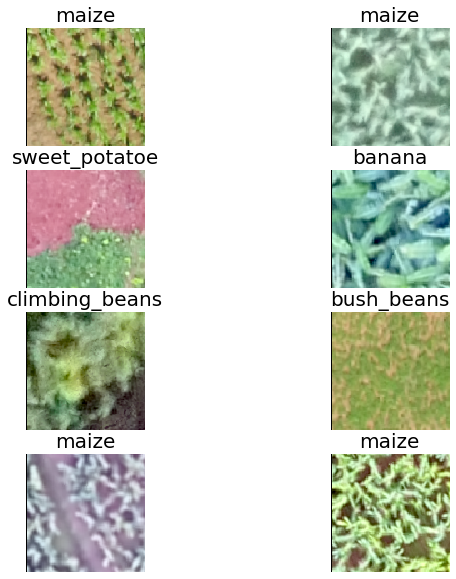

In [146]:
plots(imgs, rows=4, titles = labelNames, maxNum=8)

In [147]:
#Automatic rename with epoch number and val accuracy:
#filepath="checkpoints/weights-improvement-epeoch-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5"


 
modelName= "Model"
#save the best weights over the same file with the model name

#filepath="checkpoints/"+modelName+"_bestweights.hdf5"
filepath=modelName+"_bestweights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [148]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.42),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                30744     
Total params: 2,288,728
Trainable params: 30,744
Non-trainable params: 2,257,984
_________________________________________________________________


In [151]:
batchSize=32
stepsPerEpoch= (train_generator.samples+ (batchSize-1)) // batchSize
print("stepsPerEpoch: ", stepsPerEpoch)

validationSteps=(validation_generator.samples+ (batchSize-1)) // batchSize
print("validationSteps: ", validationSteps)


#validationSteps=(test_generator.samples+ (batchSize-1)) // batchSize
#print("validationSteps: ", validationSteps)

stepsPerEpoch:  59
validationSteps:  20


In [152]:
train_generator.reset()
validation_generator.reset()

# Fit the model
history = model.fit_generator(
    train_generator, 
    validation_data = validation_generator,
    epochs = 30,
    steps_per_epoch = stepsPerEpoch,
    validation_steps= validationSteps,
    callbacks=callbacks_list,
    verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
59/59 [==============================] - 132s 2s/step - loss: 2.7335 - acc: 0.2227 - val_loss: 1.7241 - val_acc: 0.5293

Epoch 00001: val_acc improved from -inf to 0.52932, saving model to Model_bestweights.hdf5
Epoch 2/30
59/59 [==============================] - 117s 2s/step - loss: 1.9757 - acc: 0.3807 - val_loss: 1.5843 - val_acc: 0.5896

Epoch 00002: val_acc improved from 0.52932 to 0.58958, saving model to Model_bestweights.hdf5
Epoch 3/30
59/59 [==============================] - 121s 2s/step - loss: 1.6797 - acc: 0.4908 - val_loss: 1.5314 - val_acc: 0.5896

Epoch 00003: val_acc did not improve from 0.58958
Epoch 4/30
59/59 [==============================] - 117s 2s/step - loss: 1.6198 - acc: 0.5066 - val_loss: 1.4849 - val_acc: 0.6026

Epoch 00004: val_acc improved from 0.58958 to 0.60261, saving model to Model_bestweights.hdf5
Epoch 5/30
59/59 [==============================] - 118s 2s/step - loss: 1.5479 - acc: 0.5169 - val_loss: 1.4395 - val_acc: 0.6221

Epoch 00005

In [153]:
train_generator.reset()
validation_generator.reset()

# Fit the model
history = model.fit_generator(
    train_generator, 
    validation_data = validation_generator,
    epochs = 30,
    steps_per_epoch = stepsPerEpoch,
    validation_steps= validationSteps,
    callbacks=callbacks_list,
    verbose=1)

Epoch 1/30
59/59 [==============================] - 120s 2s/step - loss: 0.9844 - acc: 0.6840 - val_loss: 1.3262 - val_acc: 0.6498

Epoch 00001: val_acc did not improve from 0.65798
Epoch 2/30
59/59 [==============================] - 118s 2s/step - loss: 0.9876 - acc: 0.6638 - val_loss: 1.3263 - val_acc: 0.6450

Epoch 00002: val_acc did not improve from 0.65798
Epoch 3/30
59/59 [==============================] - 119s 2s/step - loss: 0.9851 - acc: 0.6691 - val_loss: 1.3478 - val_acc: 0.6254

Epoch 00003: val_acc did not improve from 0.65798
Epoch 4/30
59/59 [==============================] - 123s 2s/step - loss: 0.9784 - acc: 0.6766 - val_loss: 1.3692 - val_acc: 0.6107

Epoch 00004: val_acc did not improve from 0.65798
Epoch 5/30
59/59 [==============================] - 119s 2s/step - loss: 0.9736 - acc: 0.6872 - val_loss: 1.3339 - val_acc: 0.6596

Epoch 00005: val_acc improved from 0.65798 to 0.65961, saving model to Model_bestweights.hdf5
Epoch 6/30
59/59 [============================

In [154]:
train_generator.reset()
validation_generator.reset()

# Fit the model
history = model.fit_generator(
    train_generator, 
    validation_data = validation_generator,
    epochs = 30,
    steps_per_epoch = stepsPerEpoch,
    validation_steps= validationSteps,
    callbacks=callbacks_list,
    verbose=1)


Epoch 1/30
59/59 [==============================] - 164s 3s/step - loss: 0.8324 - acc: 0.7216 - val_loss: 1.3492 - val_acc: 0.6645

Epoch 00001: val_acc did not improve from 0.67264
Epoch 2/30
59/59 [==============================] - 132s 2s/step - loss: 0.8220 - acc: 0.7126 - val_loss: 1.3410 - val_acc: 0.6564

Epoch 00002: val_acc did not improve from 0.67264
Epoch 3/30
59/59 [==============================] - 137s 2s/step - loss: 0.8223 - acc: 0.7110 - val_loss: 1.3498 - val_acc: 0.6612

Epoch 00003: val_acc did not improve from 0.67264
Epoch 4/30
59/59 [==============================] - 121s 2s/step - loss: 0.8243 - acc: 0.7073 - val_loss: 1.4149 - val_acc: 0.6352

Epoch 00004: val_acc did not improve from 0.67264
Epoch 5/30
59/59 [==============================] - 126s 2s/step - loss: 0.8237 - acc: 0.7206 - val_loss: 1.3472 - val_acc: 0.6661

Epoch 00005: val_acc did not improve from 0.67264
Epoch 6/30
59/59 [==============================] - 119s 2s/step - loss: 0.8201 - acc: 0.7